<a href="https://colab.research.google.com/github/RihabTsi/5ESGF-BD-2023/blob/main/Climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Dropdown
from ipywidgets import Layout
import ipywidgets as widgets

In [3]:
import pandas as pd

# Lire le fichier CSV en utilisant l'encodage "utf-8-sig" pour exclure le caractère BOM
df = pd.read_csv("/content/gdrive/MyDrive/ESG_BIG_DATA/Machine Learning/Mémoire/Climate change/emdat_1.csv", encoding="utf-8-sig", sep=";")


In [4]:
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1930-0013-BEL,1930,13,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",NaN,NaN,NaN,NaN
1,1930-0027-FRA,1930,27,NaN,Natural,Hydrological,Landslide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",2,NaN,16332,Rhone (Adm2).
2,1930-0007-GRC,1930,7,NaN,Natural,Meteorological,Storm,Convective storm,Hail,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",NaN,NaN,NaN,NaN
3,1932-0013-FRA,1932,13,NaN,Natural,Hydrological,Landslide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"4,672498431",2,NaN,16332,Rhone (Adm2).
4,1945-0009-BEL,1945,9,NaN,Natural,Biological,Epidemic,Viral disease,NaN,Polio,...,NaN,NaN,NaN,NaN,NaN,"6,165418661",NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     2072 non-null   object 
 1   Year                                       2072 non-null   int64  
 2   Seq                                        2072 non-null   int64  
 3   Glide                                      157 non-null    object 
 4   Disaster Group                             2072 non-null   object 
 5   Disaster Subgroup                          2072 non-null   object 
 6   Disaster Type                              2072 non-null   object 
 7   Disaster Subtype                           1609 non-null   object 
 8   Disaster Subsubtype                        184 non-null    object 
 9   Event Name                                 309 non-null    object 
 10  Country                 

In [6]:
df.shape

(2072, 50)

In [7]:
disaster_type = df.groupby('Disaster Type').size().reset_index(name='Count')

In [8]:
disaster_type

,Disaster Type,Count
0,Drought,49
1,Earthquake,185
2,Epidemic,47
3,Extreme temperature,305
4,Flood,679
5,Fog,1
6,Glacial lake outburst,1
7,Impact,1
8,Insect infestation,1
9,Landslide,86


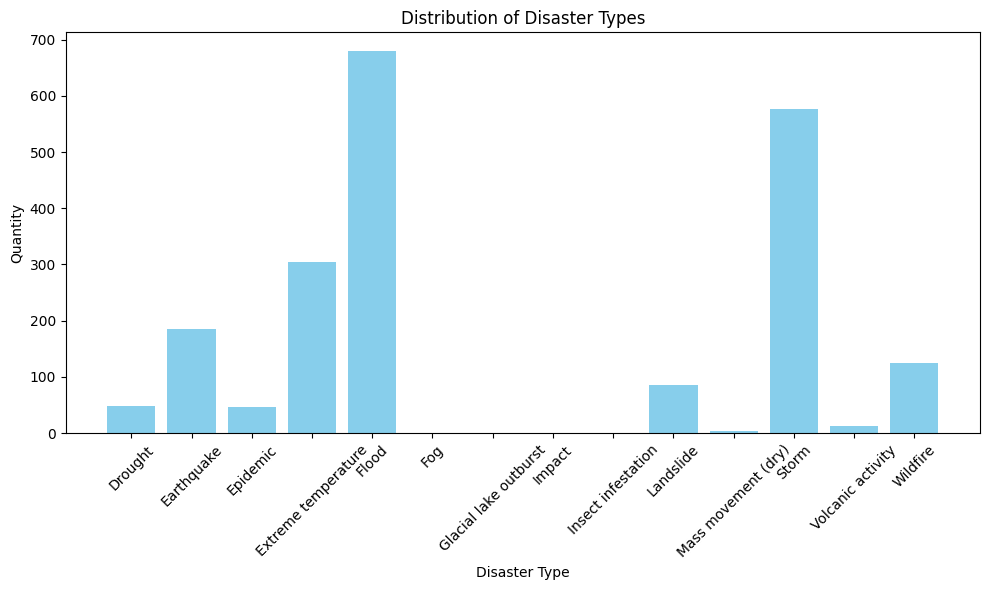

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(disaster_type["Disaster Type"], disaster_type['Count'], color='skyblue')
plt.xlabel('Disaster Type')
plt.ylabel('Quantity')
plt.title('Distribution of Disaster Types')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

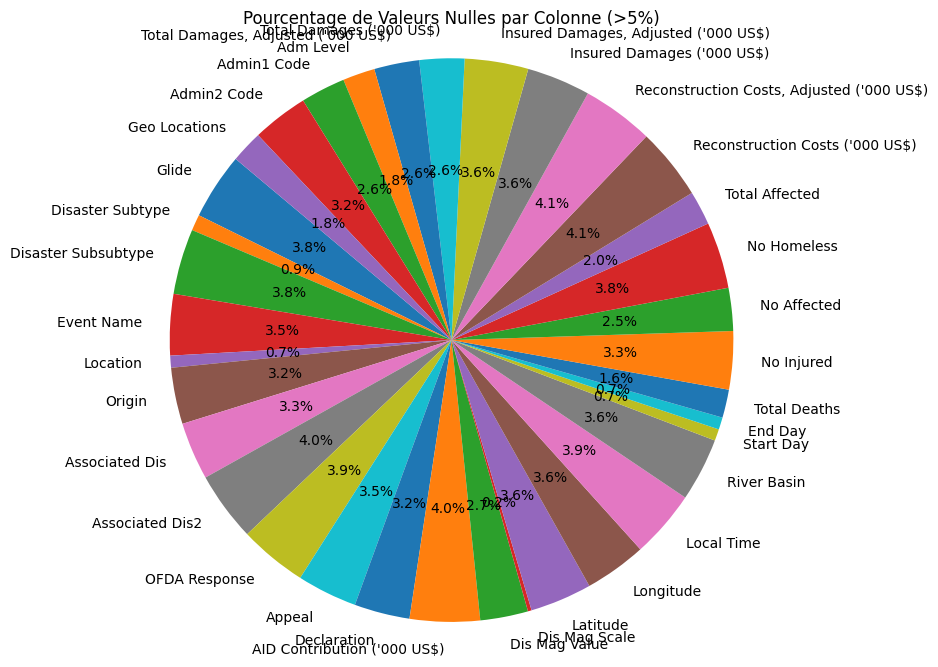

In [10]:
import matplotlib.pyplot as plt

# Comptez les valeurs nulles dans chaque colonne de votre dataframe (supposons que votre dataframe s'appelle df)
null_counts = df.isnull().sum()

# Définissez un seuil pour le pourcentage de valeurs nulles que vous souhaitez afficher
seuil = 5  # Par exemple, afficher uniquement les colonnes avec plus de 5 % de valeurs nulles

# Filtrez les colonnes qui dépassent le seuil
colonnes_a_afficher = null_counts[null_counts > (seuil / 100 * len(df))]

# Créez un camembert en utilisant les valeurs nulles pour ces colonnes
plt.figure(figsize=(8, 8))
plt.pie(colonnes_a_afficher, labels=colonnes_a_afficher.index, autopct='%1.1f%%', startangle=140)
plt.title('Pourcentage de Valeurs Nulles par Colonne (>%d%%)' % seuil)
plt.axis('equal')  # Assurez-vous que le diagramme est un cercle parfait

# Affichez le diagramme
plt.show()

# IMPACTS OF NATURAL DISASTERS BY DISASTER TYPE



In [11]:
df = df.rename(columns={ "Total Damages, Adjusted ('000 US$)": "Total Damages Adjusted", "Total Damages ('000 US$)": "Total Damages"})

In [12]:
df.head(20)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages,Total Damages Adjusted,CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1930-0013-BEL,1930,13,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",NaN,NaN,NaN,NaN
1,1930-0027-FRA,1930,27,NaN,Natural,Hydrological,Landslide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",2,NaN,16332,Rhone (Adm2).
2,1930-0007-GRC,1930,7,NaN,Natural,Meteorological,Storm,Convective storm,Hail,NaN,...,NaN,NaN,NaN,NaN,NaN,"5,720961493",NaN,NaN,NaN,NaN
3,1932-0013-FRA,1932,13,NaN,Natural,Hydrological,Landslide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"4,672498431",2,NaN,16332,Rhone (Adm2).
4,1945-0009-BEL,1945,9,NaN,Natural,Biological,Epidemic,Viral disease,NaN,Polio,...,NaN,NaN,NaN,NaN,NaN,"6,165418661",NaN,NaN,NaN,NaN
5,1946-0022-AZO,1946,22,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"6,678253854",NaN,NaN,NaN,NaN
6,1949-0027-FRA,1949,27,NaN,Natural,Climatological,Wildfire,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"8,148381409",NaN,NaN,NaN,NaN
7,1951-0029-CHE,1951,29,NaN,Natural,Hydrological,Landslide,Avalanche,NaN,NaN,...,NaN,NaN,NaN,20000.0,224994.0,"8,889143356",NaN,NaN,NaN,NaN
8,1952-0034-AUT,1952,34,NaN,Natural,Hydrological,Landslide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"9,094277433",NaN,NaN,NaN,NaN
9,1952-0005-GBR,1952,5,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"9,094277433",NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     2072 non-null   object 
 1   Year                                       2072 non-null   int64  
 2   Seq                                        2072 non-null   int64  
 3   Glide                                      157 non-null    object 
 4   Disaster Group                             2072 non-null   object 
 5   Disaster Subgroup                          2072 non-null   object 
 6   Disaster Type                              2072 non-null   object 
 7   Disaster Subtype                           1609 non-null   object 
 8   Disaster Subsubtype                        184 non-null    object 
 9   Event Name                                 309 non-null    object 
 10  Country                 

In [14]:
#add date nAn Value to 1
df['Start Month'] = df['Start Month'].fillna(1)
df['Start Day'] = df['Start Day'].fillna(1)

In [15]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Dis No                                        0.000000
Year                                          0.000000
Seq                                           0.000000
Glide                                        92.422780
Disaster Group                                0.000000
Disaster Subgroup                             0.000000
Disaster Type                                 0.000000
Disaster Subtype                             22.345560
Disaster Subsubtype                          91.119691
Event Name                                   85.086873
Country                                       0.000000
ISO                                           0.000000
Region                                        0.000000
Continent                                     0.000000
Location                                     16.698842
Origin                                       78.474903
Associated Dis                               80.212355
Associated Dis2                              96.621622
OFDA Respo

In [16]:
# converting the float to int64
df['Start Month'] = df['Start Month'].astype('int64')
df['Start Day'] = df['Start Day'].astype('int64')

In [17]:
from datetime import datetime
df['Date'] = df.apply(lambda row: datetime(year=row['Start Year'], month=row['Start Month'], day=row['Start Day']), axis=1)

# Formater la nouvelle colonne 'Date' au format 'YY-mm-dd'
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


In [18]:
df['Date']

0       1930-12-02
1       1930-11-13
2       1930-06-13
3       1932-05-08
4       1945-01-01
           ...    
2067    2023-05-07
2068    2023-07-18
2069    2023-07-21
2070    2023-01-18
2071    2023-07-18
Name: Date, Length: 2072, dtype: object

In [19]:
#df['Total Affected'] = df['Total Affected'] * 1000
#df['Total Deaths'] = df['Total Deaths'] * 1000
#df['Total Damages'] = df['Total Damages'] * 1000
#df['Total Damages Adjusted'] = df['Total Damages Adjusted'] * 1000
#df

In [20]:
colonnes = ['Disaster Type','Total Deaths','Total Affected',"Total Damages Adjusted"]

In [21]:
Impact = df[colonnes]


In [22]:
Impact.head()

,Disaster Type,Total Deaths,Total Affected,Total Damages Adjusted
0,Storm,60.0,NaN,NaN
1,Landslide,40.0,NaN,NaN
2,Storm,22.0,NaN,NaN
3,Landslide,30.0,NaN,NaN
4,Epidemic,NaN,104.0,NaN


In [23]:
Impact_1 = Impact.groupby(
   ['Disaster Type'], as_index=False).agg(
    {
         'Total Deaths':'sum',    # count number of orders for each customer in each country

         'Total Affected': 'sum',
         'Total Damages Adjusted' : 'sum' # get the last date per group
    }
)


In [24]:
Impact_1 = Impact_1.set_index('Disaster Type')

In [25]:
#Colonne = ['Total Deaths', 'Total Affected', 'Total Damages Adjusted']
#total = Impact_1[Colonne].sum()
#Impact_1.loc["Total"] = total

In [26]:
Impact_1["% Total Deaths"] = (Impact_1['Total Deaths'] / Impact_1['Total Deaths'].sum())*100
Impact_1["% Total Affected"] = (Impact_1['Total Affected'] / Impact_1['Total Affected'].sum())*100
Impact_1["% Total Damages Adjusted"] = (Impact_1['Total Damages Adjusted'] / Impact_1['Total Damages Adjusted'].sum())*100
Impact_1 = Impact_1[['Total Deaths','% Total Deaths','Total Affected','% Total Affected',	'Total Damages Adjusted','% Total Damages Adjusted']]
Impact_1

,Total Deaths,% Total Deaths,Total Affected,% Total Affected,Total Damages Adjusted,% Total Damages Adjusted
Disaster Type,,,,,,
Drought,2.0,0.000491,10488769.0,22.444163,54320645.0,6.153917
Earthquake,155707.0,38.248508,6187805.0,13.240839,238658704.0,27.037344
Epidemic,475.0,0.116681,189834.0,0.406212,0.0,0.000000
Extreme temperature,216576.0,53.200620,1457392.0,3.118568,33029935.0,3.741920
Flood,8777.0,2.156018,17425835.0,37.288291,316774273.0,35.886958
Fog,4000.0,0.982576,0.0,0.000000,0.0,0.000000
Glacial lake outburst,11.0,0.002702,0.0,0.000000,0.0,0.000000
Impact,0.0,0.000000,301491.0,0.645139,41457.0,0.004697
Insect infestation,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [27]:
Impact_1= Impact_1.reset_index()
Impact_1

,Disaster Type,Total Deaths,% Total Deaths,Total Affected,% Total Affected,Total Damages Adjusted,% Total Damages Adjusted
0,Drought,2.0,0.000491,10488769.0,22.444163,54320645.0,6.153917
1,Earthquake,155707.0,38.248508,6187805.0,13.240839,238658704.0,27.037344
2,Epidemic,475.0,0.116681,189834.0,0.406212,0.0,0.000000
3,Extreme temperature,216576.0,53.200620,1457392.0,3.118568,33029935.0,3.741920
4,Flood,8777.0,2.156018,17425835.0,37.288291,316774273.0,35.886958
5,Fog,4000.0,0.982576,0.0,0.000000,0.0,0.000000
6,Glacial lake outburst,11.0,0.002702,0.0,0.000000,0.0,0.000000
7,Impact,0.0,0.000000,301491.0,0.645139,41457.0,0.004697
8,Insect infestation,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,Landslide,16813.0,4.130015,45386.0,0.097118,7461242.0,0.845275


In [28]:
import plotly.graph_objects as go
fig = go.Figure()

for col in ["% Total Deaths", "% Total Affected", "% Total Damages Adjusted"]:
    fig.add_trace(go.Bar(
        x=Impact_1["Disaster Type"],
        y=Impact_1[col],
        name=col
    ))

# Mettez en forme le graphique
fig.update_layout(
    title="Histogramme des Impacts par Type de Catastrophe",
    xaxis_title="Type de Catastrophe",
    yaxis_title="Valeur",
    barmode="group"
)

# Affichez le graphique
fig.show()

# NUMBER OF DISASTERS IN EUROPE

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     2072 non-null   object 
 1   Year                                       2072 non-null   int64  
 2   Seq                                        2072 non-null   int64  
 3   Glide                                      157 non-null    object 
 4   Disaster Group                             2072 non-null   object 
 5   Disaster Subgroup                          2072 non-null   object 
 6   Disaster Type                              2072 non-null   object 
 7   Disaster Subtype                           1609 non-null   object 
 8   Disaster Subsubtype                        184 non-null    object 
 9   Event Name                                 309 non-null    object 
 10  Country                 

In [30]:
Colonne_2 =['Disaster Type', 'Year']
Disasters = df[Colonne_2]
Disasters

,Disaster Type,Year
0,Storm,1930
1,Landslide,1930
2,Storm,1930
3,Landslide,1932
4,Epidemic,1945
...,...,...
2067,Wildfire,2023
2068,Storm,2023
2069,Storm,2023
2070,Flood,2023


In [31]:
Disasters = Disasters.groupby(
   ['Year'], as_index=False).agg(
    {
         'Disaster Type':'count',    # count number of orders for each customer in each country

    }
)
print(Disasters)

    Year  Disaster Type
0   1930              8
1   1931              1
2   1932              2
3   1933              1
4   1934              1
..   ...            ...
84  2019             57
85  2020             43
86  2021             54
87  2022             70
88  2023             29

[89 rows x 2 columns]


In [32]:
Disasters

,Year,Disaster Type
0,1930,8
1,1931,1
2,1932,2
3,1933,1
4,1934,1
...,...,...
84,2019,57
85,2020,43
86,2021,54
87,2022,70


In [33]:
import plotly.express as px


fig = px.bar(Disasters, x='Year', y='Disaster Type',
             color='Disaster Type',
             labels={'Disaster Type':'Number of disasters'}, height=500)
fig.update_yaxes(type='log')
fig.update_layout(
    title={
        'text': 'Histogram of number of disasters per year',
        'x': 0.5,  # Centre le titre horizontalement
        'xanchor': 'center'  # Centre l'ancre du titre horizontalement
    }
)
fig.show()

# NUMBER OF PEOPLE KILLED IN EUROPE

In [34]:
Colonne_3 =['Year', 'Total Deaths']
Killed = df[Colonne_3]
Killed

,Year,Total Deaths
0,1930,60.0
1,1930,40.0
2,1930,22.0
3,1932,30.0
4,1945,NaN
...,...,...
2067,2023,21.0
2068,2023,NaN
2069,2023,1.0
2070,2023,2.0


In [35]:
Killed = Killed.groupby(
   ['Year'], as_index=False).agg(
    {
         'Total Deaths':'sum',    # count number of orders for each customer in each country

    }
)
print(Killed)

    Year  Total Deaths
0   1930        2234.0
1   1931          90.0
2   1932         181.0
3   1933          10.0
4   1934           0.0
..   ...           ...
84  2019        2918.0
85  2020        6683.0
86  2021         299.0
87  2022       61658.0
88  2023          75.0

[89 rows x 2 columns]


In [36]:
fig = px.bar(Killed, x='Year', y='Total Deaths',
            color='Total Deaths',
             labels={'Total Deaths':'Number of deaths'}, height=500)
fig.update_yaxes(type='log')
fig.update_layout(
    title={
        'text': 'Histogram of number of deaths per year',
        'x': 0.5,  # Centre le titre horizontalement
        'xanchor': 'center'  # Centre l'ancre du titre horizontalement
    }
)
fig.show()

# ECONOMIC DAMAGE IN EUROPE

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     2072 non-null   object 
 1   Year                                       2072 non-null   int64  
 2   Seq                                        2072 non-null   int64  
 3   Glide                                      157 non-null    object 
 4   Disaster Group                             2072 non-null   object 
 5   Disaster Subgroup                          2072 non-null   object 
 6   Disaster Type                              2072 non-null   object 
 7   Disaster Subtype                           1609 non-null   object 
 8   Disaster Subsubtype                        184 non-null    object 
 9   Event Name                                 309 non-null    object 
 10  Country                 

In [38]:
Colonnes_3 =['Year', 'Total Damages Adjusted']

In [39]:
Economic = df[Colonnes_3]
Economic

,Year,Total Damages Adjusted
0,1930,NaN
1,1930,NaN
2,1930,NaN
3,1932,NaN
4,1945,NaN
...,...,...
2067,2023,NaN
2068,2023,NaN
2069,2023,NaN
2070,2023,NaN


In [40]:
Economic = Economic.groupby(
   ['Year'], as_index=False).agg(
    {
         'Total Damages Adjusted':'sum',    # count number of orders for each customer in each country

    }
)
print(Economic)

    Year  Total Damages Adjusted
0   1930                 87398.0
1   1931                     0.0
2   1932                     0.0
3   1933                     0.0
4   1934                     0.0
..   ...                     ...
84  2019               4933720.0
85  2020              17048853.0
86  2021              56694991.0
87  2022               2155918.0
88  2023                     0.0

[89 rows x 2 columns]


In [41]:
fig = px.bar(Economic, x='Year', y='Total Damages Adjusted',
            color='Total Damages Adjusted',
             labels={'Total Damages Adjusted':"Total of economic damages 000'US$ "}, height=500)
fig.update_yaxes(type='log')
fig.update_layout(
    title={
        'text': 'Histogram of economic damages',
        'x': 0.5,  # Centre le titre horizontalement
        'xanchor': 'center'  # Centre l'ancre du titre horizontalement
    }
)
fig.show()

THE 25 WORST DISASTERS IN EUROPE

In [42]:
Colonnes_4 = ['Disaster Type', 'Year','Country', 'Total Deaths','Total Affected','Total Damages Adjusted']


In [43]:
Worst = df[Colonnes_4]
Worst

,Disaster Type,Year,Country,Total Deaths,Total Affected,Total Damages Adjusted
0,Storm,1930,Belgium,60.0,NaN,NaN
1,Landslide,1930,France,40.0,NaN,NaN
2,Storm,1930,Greece,22.0,NaN,NaN
3,Landslide,1932,France,30.0,NaN,NaN
4,Epidemic,1945,Belgium,NaN,104.0,NaN
...,...,...,...,...,...,...
2067,Wildfire,2023,Russian Federation (the),21.0,15000.0,NaN
2068,Storm,2023,Slovakia,NaN,NaN,NaN
2069,Storm,2023,Serbia,1.0,NaN,NaN
2070,Flood,2023,Serbia,2.0,210.0,NaN


In [44]:
Worst = Worst.groupby(
   ['Disaster Type','Country','Year'], as_index=False).agg(
    {
         'Total Deaths' : 'sum',
         'Total Affected' : "sum",
         'Total Damages Adjusted':'sum'
    }
)


In [45]:
Worst.sort_values(['Total Deaths'], ascending=False).head(25)

,Disaster Type,Country,Year,Total Deaths,Total Affected,Total Damages Adjusted
163,Earthquake,Soviet Union,1948,110000.0,0.0,303835.0
438,Extreme temperature,Russian Federation (the),2010,55760.0,11.0,536845.0
172,Earthquake,Soviet Union,1988,25000.0,1642000.0,34645914.0
342,Extreme temperature,Italy,2003,20089.0,0.0,6999853.0
299,Extreme temperature,France,2003,19490.0,0.0,6999853.0
351,Extreme temperature,Italy,2022,18010.0,0.0,0.0
461,Extreme temperature,Spain,2003,15090.0,0.0,1399971.0
1014,Landslide,Soviet Union,1949,12000.0,0.0,0.0
467,Extreme temperature,Spain,2022,11324.0,0.0,0.0
313,Extreme temperature,Germany,2003,9355.0,0.0,2624945.0


# Prédiction Fb Prophet

In [46]:
Colonnes_5 = ['Disaster Type','Date','Country', 'Total Deaths','Total Affected','Total Damages Adjusted']
Disaster_Pred = df[Colonnes_5]
Disaster_Pred

,Disaster Type,Date,Country,Total Deaths,Total Affected,Total Damages Adjusted
0,Storm,1930-12-02,Belgium,60.0,NaN,NaN
1,Landslide,1930-11-13,France,40.0,NaN,NaN
2,Storm,1930-06-13,Greece,22.0,NaN,NaN
3,Landslide,1932-05-08,France,30.0,NaN,NaN
4,Epidemic,1945-01-01,Belgium,NaN,104.0,NaN
...,...,...,...,...,...,...
2067,Wildfire,2023-05-07,Russian Federation (the),21.0,15000.0,NaN
2068,Storm,2023-07-18,Slovakia,NaN,NaN,NaN
2069,Storm,2023-07-21,Serbia,1.0,NaN,NaN
2070,Flood,2023-01-18,Serbia,2.0,210.0,NaN


In [47]:
Disaster_Pred = Disaster_Pred.groupby(
   ['Disaster Type','Country','Date'], as_index=False).agg(
    {
         'Total Deaths' : 'sum',
         'Total Affected' : "sum",
         'Total Damages Adjusted':'sum'
    }
)

In [48]:
Disaster_Pred['Date'] = pd.to_datetime(Disaster_Pred['Date'])

In [49]:
Disaster_Pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Disaster Type           2069 non-null   object        
 1   Country                 2069 non-null   object        
 2   Date                    2069 non-null   datetime64[ns]
 3   Total Deaths            2069 non-null   float64       
 4   Total Affected          2069 non-null   float64       
 5   Total Damages Adjusted  2069 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 97.1+ KB


In [50]:
#Ordre décroissant
Date_sort = Disaster_Pred.sort_values('Date', ascending=False)

In [51]:
Drought = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Drought') ]
Earthquake = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Earthquake') ]
Extreme_temperature = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Extreme temperature') ]
Fog= Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Fog') ]
Glacial_lake_outburst= Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Glacial lake outburst') ]
Storm = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Storm') ]
Wildfire = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Wildfire') ]
Mass_movement = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Mass movement (dry)') ]
Volcanic_activity = Disaster_Pred[ (Disaster_Pred['Disaster Type'] == 'Volcanic activity') ]

In [52]:
Disaster_Pred.tail()

,Disaster Type,Country,Date,Total Deaths,Total Affected,Total Damages Adjusted
2064,Wildfire,Sweden,2018-07-08,0.0,0.0,118877.0
2065,Wildfire,Ukraine,2020-07-06,5.0,300.0,183184.0
2066,Wildfire,Ukraine,2020-09-30,11.0,1668.0,0.0
2067,Wildfire,Yugoslavia,1983-07-25,0.0,0.0,587660.0
2068,Wildfire,Yugoslavia,1985-08-06,0.0,0.0,0.0


In [53]:
import ipywidgets as widgets
from IPython.display import display

# Créez une liste des noms uniques de types de catastrophes
unique_catastrophe_types = Disaster_Pred['Disaster Type'].unique()

# Créez une liste des noms de colonnes numériques
numeric_columns = ['Total Deaths', 'Total Affected', 'Total Damages Adjusted']

# Créez des widgets boutons pour les options de colonnes et les types de catastrophes
column_buttons = widgets.Dropdown(options=numeric_columns, description='Column:')
cat_buttons = widgets.Dropdown(options=unique_catastrophe_types, description='Category:')

# Créez un widget de liste déroulante pour les pays (assurez-vous d'avoir la liste des pays)
country_list = Disaster_Pred['Country'].unique()  # Assurez-vous d'avoir la liste des pays
country_dropdown = widgets.Dropdown(options=country_list, description='Country:')
algoChoices = {2: "Select", 0: "FB Prophet", 3: "Plot Times series"}
algoChoice = widgets.Dropdown(options=algoChoices.values(), description='Algorithm:')
# Créez un bouton pour soumettre les sélections
submit_button = widgets.Button(description='Submit')

# Fonction pour traiter la soumission
def on_submit_button_clicked(b):
    selected_category = cat_buttons.value
    selected_column = column_buttons.value
    selected_country = country_dropdown.value
    selected_data = Disaster_Pred[(Disaster_Pred['Disaster Type'] == selected_category) & (Disaster_Pred['Country'] == selected_country)]
    selected_algorithm = algoChoice.value  # Utilisez algoChoice.value au lieu de AlgoChoices.value
    # Créez votre graphique interactif ici en utilisant les données sélectionnées
    if selected_algorithm == "FB Prophet":
       my_prophet(selected_category, selected_column)



In [54]:
import prophet as Prophet

In [55]:
def my_prophet(selected_category, selected_column):
    selected_data = Disaster_Pred[Disaster_Pred['Disaster Type'] == selected_category]

    # Préparez les données pour Prophet
    df_temp = selected_data[['Date', selected_column]]
    df_temp.columns = ['ds', 'y']

    # Créez le modèle Prophet
    model = Prophet.Prophet()  # Utilisez le nom du module
    model.fit(df_temp)

    # Créez un dataframe pour les prédictions futures
    future = model.make_future_dataframe(periods=365 * 10)  # Prédire pour 10 ans
    forecast = model.predict(future)

    # Affichez les prédictions
    fig = model.plot(forecast)
    plt.title(f"{selected_column} Prediction for {selected_category}")
    plt.xlabel('Date')
    plt.ylabel(selected_column)
    plt.show()


In [56]:
!pip install prophet

In [57]:
# Fonction pour le menu
def Choice(A):
    if A==2:
        return ("Select")
    elif A==0:
        return my_Prophet()
    elif A==3:
      return my_prophet()


In [58]:
# Attachez la fonction à l'événement "click" du bouton de soumission
submit_button.on_click(on_submit_button_clicked)

# Affichez les widgets
widgets.VBox([cat_buttons, column_buttons, country_dropdown, algoChoice, submit_button])